In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

import warnings
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

def eval_genome(genome, config):
    """
    This function will be run in parallel by ParallelEvaluator.  It takes two
    arguments (a single genome and the genome class configuration data) and
    should return one float (that genome's fitness).

    Note that this function needs to be in module scope for multiprocessing.Pool
    (which is what ParallelEvaluator uses) to find it.  Because of this, make
    sure you check for __main__ before executing any code (as we do here in the
    last few lines in the file), otherwise you'll have made a fork bomb
    instead of a neuroevolution demo. :)
    """
    if_no_connect = True
    
    net = neat.nn.FeedForwardNetwork.create(genome, config)
    error = 0.0
    for xi, xo in zip(x_inputs, x_outputs):
        output = net.activate(xi)
        # error -= (output[0] - xo[0]) ** 2
        error -= np.abs(output[0] - xo[0])
        if float(output[0]) != 0:
            if_no_connect = False
    
    if if_no_connect:
        mse = -20
    else:
        mse = error/L
    # mad = error/L
    return mse


def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)

    # Run for up to 300 generations.
    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = p.run(pe.evaluate, 1000)

    return [stats,winner]

In [72]:
def ackley(a):
    d = len(a)
    term1 = - 20 * np.exp(-0.2*np.sqrt(np.sum(a**2)/d))
    term2 = - np.exp(np.sum(np.cos(a*2*np.pi))/d)
    f = term1 + term2 + 20 + np.exp(1)
    return f

In [73]:
d = 10

x_inputs = []
x_outputs = []

for i in range(1000):
    A = -32.768
    B = 32.768#小数的范围A ~ B
    a = np.random.uniform(A,B,d)
    x_inputs.append(tuple(a))
    y = ackley(a)
    x_outputs.append(tuple([y]))

In [74]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward")

stats_list = []
winner_list = []
for i in range(1):
    [stats,winner] = run(config_path)
    stats_list.append(stats)
    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 0.956, standard deviation 0.765
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100     -1.0    0.000     0
Total extinctions: 0
Generation time: 0.143 sec

 ****** Running generation 1 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.155, standard deviation 0.875
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   100     -1.0    0.000     1
Total extinctions: 0
Generation time: 0.118 sec (0.131 average)

 ****** Running generation 2 ****** 

Population's average fitness: -1.00000 stdev:

Population's average fitness: -50.52730 stdev: 492.79037
Best fitness: -1.00000 - size: (1, 0) - species 3 - id 512
Average adjusted fitness: 0.990
Mean genetic distance 2.987, standard deviation 1.700
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    44     -1.0    1.000    17
     2   15    23   -151.1    0.970    14
     3   13    32     -1.0    1.000    12
Total extinctions: 0
Generation time: 0.137 sec (0.125 average)

 ****** Running generation 18 ****** 

Population's average fitness: -244.96044 stdev: 1057.82328
Best fitness: -1.00000 - size: (1, 0) - species 2 - id 578
Average adjusted fitness: 0.939
Mean genetic distance 2.818, standard deviation 1.468
Population of 99 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    51   -110.4    0.978    18
     2   16    22   -634.5    0.870    15
     3   14    26   -149.9    0.96

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 2670
Average adjusted fitness: 0.000
Mean genetic distance 1.809, standard deviation 1.243
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   31    20     -1.0    0.000    30
     4    8    80     -1.0    0.000     1
Total extinctions: 0
Generation time: 0.120 sec (0.126 average)

 ****** Running generation 34 ****** 

Population's average fitness: -97.77374 stdev: 677.42386
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 2670
Average adjusted fitness: 0.969
Mean genetic distance 1.810, standard deviation 1.301
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   32    30   -244.1    0.950    31
     4    9    70    -61.2    0.988     2
Total extinctions: 0
Generation time: 0.123 sec (0.122 average)

 ****** Runn

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 2 - id 4617
Average adjusted fitness: 0.000
Mean genetic distance 1.663, standard deviation 1.208
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   47    34     -1.0    0.000    46
     4   24    66     -1.0    0.000    17
Total extinctions: 0
Generation time: 0.127 sec (0.124 average)

 ****** Running generation 50 ****** 

Population's average fitness: -49.31409 stdev: 480.71916
Best fitness: -1.00000 - size: (1, 0) - species 2 - id 4617
Average adjusted fitness: 0.992
Mean genetic distance 1.731, standard deviation 1.203
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   48    40     -1.0    1.000    47
     4   25    60    -74.2    0.985    18
Total extinctions: 0
Generation time: 0.120 sec (0.125 average)

 ****** Runn

Population's average fitness: -98.27616 stdev: 680.94022
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 4661
Average adjusted fitness: 0.984
Mean genetic distance 1.643, standard deviation 1.126
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   63    28     -1.0    1.000    62
     4   40    72   -153.0    0.969    33
Total extinctions: 0
Generation time: 0.138 sec (0.135 average)

 ****** Running generation 66 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 4661
Average adjusted fitness: 0.000
Mean genetic distance 1.714, standard deviation 1.135
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   64    21     -1.0    0.000    63
     4   41    79     -1.0    0.000    34
Total extinctions: 0
Generation time: 0.120 sec (0.133 average)

 ****** Runn

Population's average fitness: -147.80226 stdev: 834.85230
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 7185
Average adjusted fitness: 0.964
Mean genetic distance 1.622, standard deviation 1.114
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   79    35   -281.9    0.944    78
     4   56    65    -75.6    0.985    49
Total extinctions: 0
Generation time: 0.136 sec (0.132 average)

 ****** Running generation 82 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 2 - id 5160
Average adjusted fitness: 0.000
Mean genetic distance 1.867, standard deviation 1.311
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   80    25     -1.0    0.000    79
     4   57    75     -1.0    0.000    50
Total extinctions: 0
Generation time: 0.135 sec (0.132 average)

 ****** Run

Population's average fitness: -49.44978 stdev: 482.06925
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 9344
Average adjusted fitness: 0.993
Mean genetic distance 1.666, standard deviation 1.167
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   95    28     -1.0    1.000    94
     4   72    72    -73.3    0.985    65
Total extinctions: 0
Generation time: 0.137 sec (0.135 average)

 ****** Running generation 98 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 9344
Average adjusted fitness: 0.000
Mean genetic distance 1.877, standard deviation 1.351
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   96    21     -1.0    0.000    95
     4   73    79     -1.0    0.000    66
Total extinctions: 0
Generation time: 0.132 sec (0.134 average)

 ****** Runn

Population's average fitness: -96.45092 stdev: 668.15825
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 9344
Average adjusted fitness: 0.984
Mean genetic distance 1.725, standard deviation 1.222
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  111    37     -1.0    1.000   110
     4   88    63   -155.0    0.968    81
Total extinctions: 0
Generation time: 0.140 sec (0.137 average)

 ****** Running generation 114 ****** 

Population's average fitness: -97.86965 stdev: 678.08768
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 9344
Average adjusted fitness: 0.973
Mean genetic distance 1.675, standard deviation 1.154
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  112    31   -262.8    0.946   111
     4   89    69     -1.0    1.000    82
Total extinctions: 0
Generation time: 0.134 sec (0.137 average)

 ****** 

Population's average fitness: -194.55022 stdev: 948.26980
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 11778
Average adjusted fitness: 0.957
Mean genetic distance 1.653, standard deviation 1.157
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  127    31   -247.4    0.950   126
     4  104    69   -181.3    0.963    97
Total extinctions: 0
Generation time: 0.142 sec (0.137 average)

 ****** Running generation 130 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 2 - id 8720
Average adjusted fitness: 0.000
Mean genetic distance 1.728, standard deviation 1.246
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  128    25     -1.0    0.000   127
     4  105    75     -1.0    0.000    98
Total extinctions: 0
Generation time: 0.137 sec (0.138 average)

 ****** R

Population's average fitness: -145.83474 stdev: 823.57772
Best fitness: -1.00000 - size: (1, 0) - species 2 - id 8720
Average adjusted fitness: 0.967
Mean genetic distance 1.612, standard deviation 1.051
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  143    44   -243.3    0.950   142
     4  120    56    -80.8    0.984   113
Total extinctions: 0
Generation time: 0.143 sec (0.142 average)

 ****** Running generation 146 ****** 

Population's average fitness: -147.22841 stdev: 831.55366
Best fitness: -1.00000 - size: (1, 0) - species 2 - id 8720
Average adjusted fitness: 0.971
Mean genetic distance 1.582, standard deviation 1.054
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  144    30   -111.6    0.978   143
     4  121    70   -175.2    0.965   114
Total extinctions: 0
Generation time: 0.140 sec (0.142 average)

 *****

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 11778
Average adjusted fitness: 0.000
Mean genetic distance 1.897, standard deviation 1.235
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  159    32     -1.0    0.000   158
     4  136    68     -1.0    0.000   129
Total extinctions: 0
Generation time: 0.144 sec (0.142 average)

 ****** Running generation 162 ****** 

Population's average fitness: -97.80157 stdev: 677.61456
Best fitness: -1.00000 - size: (1, 0) - species 4 - id 11778
Average adjusted fitness: 0.985
Mean genetic distance 1.896, standard deviation 1.331
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  160    34     -1.0    1.000   159
     4  137    66   -143.4    0.971   130
Total extinctions: 0
Generation time: 0.155 sec (0.144 average)

 ****** R

Population's average fitness: -48.05792 stdev: 468.22044
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 17249
Average adjusted fitness: 0.996
Mean genetic distance 2.689, standard deviation 1.735
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  175    18     -1.0    1.000   174
     5    8    17     -1.0    1.000     7
     6    2    65    -63.7    0.987     0
Total extinctions: 0
Generation time: 0.146 sec (0.144 average)

 ****** Running generation 178 ****** 

Population's average fitness: -93.08191 stdev: 645.31085
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 17346
Average adjusted fitness: 0.990
Mean genetic distance 2.806, standard deviation 1.826
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2  176    27     -1.0    1.000   175
     5    9    11     -1.0    1.000     8
     6    3    62   -142.7   

Population's average fitness: -99.31281 stdev: 688.23604
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 18586
Average adjusted fitness: 0.975
Mean genetic distance 3.047, standard deviation 2.129
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   24    24     -1.0    1.000    23
     6   18    53     -1.0    1.000     8
     7    6    24   -379.1    0.924     5
Total extinctions: 0
Generation time: 0.148 sec (0.147 average)

 ****** Running generation 194 ****** 

Population's average fitness: -48.41257 stdev: 474.12571
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 18586
Average adjusted fitness: 0.994
Mean genetic distance 3.214, standard deviation 2.118
Population of 101 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   25    23     -1.0    1.000    24
     6   19    46    -91.4    0.981     9
     7    7    32     -1.0   

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.000
Mean genetic distance 2.631, standard deviation 1.633
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   34    83     -1.0    0.000    24
     7   22    17     -1.0    0.000    21
Total extinctions: 0
Generation time: 0.154 sec (0.155 average)

 ****** Running generation 210 ****** 

Population's average fitness: -49.07656 stdev: 478.35572
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.994
Mean genetic distance 2.227, standard deviation 1.541
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   35    75    -58.9    0.988    25
     7   23    25     -1.0    1.000    22
Total extinctions: 0
Generation time: 0.146 sec (0.150 average)

 ****** R

Population's average fitness: -97.79437 stdev: 677.56781
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.977
Mean genetic distance 2.151, standard deviation 1.272
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   50    71    -72.9    0.985    40
     7   38    29   -148.3    0.970    37
Total extinctions: 0
Generation time: 0.153 sec (0.149 average)

 ****** Running generation 226 ****** 

Population's average fitness: -50.74509 stdev: 494.95743
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 20640
Average adjusted fitness: 0.993
Mean genetic distance 2.084, standard deviation 1.170
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   51    59    -71.1    0.986    41
     7   39    41     -1.0    1.000    38
Total extinctions: 0
Generation time: 0.144 sec (0.149 average)

 *****

Population's average fitness: -144.38195 stdev: 817.02294
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.969
Mean genetic distance 2.112, standard deviation 1.250
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   66    63    -76.3    0.985    56
     7   54    37   -238.4    0.953    53
Total extinctions: 0
Generation time: 0.150 sec (0.149 average)

 ****** Running generation 242 ****** 

Population's average fitness: -96.55318 stdev: 668.87419
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 22622
Average adjusted fitness: 0.984
Mean genetic distance 2.111, standard deviation 1.154
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   67    57   -152.7    0.968    57
     7   55    43     -1.0    1.000    54
Total extinctions: 0
Generation time: 0.154 sec (0.150 average)

 ****

Population's average fitness: -97.66725 stdev: 676.67576
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 25159
Average adjusted fitness: 0.983
Mean genetic distance 2.130, standard deviation 1.427
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   84    62   -167.7    0.966    74
     7   72    38     -1.0    1.000    71
Total extinctions: 0
Generation time: 0.158 sec (0.165 average)

 ****** Running generation 260 ****** 

Population's average fitness: -146.54481 stdev: 827.62111
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.966
Mean genetic distance 2.065, standard deviation 1.316
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   85    65    -78.5    0.984    75
     7   73    35   -257.5    0.947    72
Total extinctions: 0
Generation time: 0.158 sec (0.165 average)

 ****

Population's average fitness: -49.41351 stdev: 481.70830
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.992
Mean genetic distance 2.113, standard deviation 1.271
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  100    63    -83.1    0.983    90
     7   88    37     -1.0    1.000    87
Total extinctions: 0
Generation time: 0.148 sec (0.160 average)

 ****** Running generation 276 ****** 

Population's average fitness: -49.12566 stdev: 478.84425
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.992
Mean genetic distance 2.289, standard deviation 1.211
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  101    62    -77.4    0.984    91
     7   89    38     -1.0    1.000    88
Total extinctions: 0
Generation time: 0.144 sec (0.156 average)

 *****

Population's average fitness: -196.57984 stdev: 958.26295
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 19983
Average adjusted fitness: 0.960
Mean genetic distance 2.215, standard deviation 1.489
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  117    59   -164.6    0.967   107
     7  105    41   -242.6    0.952   104
Total extinctions: 0
Generation time: 0.174 sec (0.168 average)

 ****** Running generation 293 ****** 

Population's average fitness: -98.55465 stdev: 682.88965
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 27174
Average adjusted fitness: 0.979
Mean genetic distance 2.354, standard deviation 1.671
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  118    55    -83.3    0.983   108
     7  106    45   -120.5    0.976   105
Total extinctions: 0
Generation time: 0.188 sec (0.172 average)

 ****

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 27174
Average adjusted fitness: 0.000
Mean genetic distance 2.119, standard deviation 1.240
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  133    69     -1.0    0.000   123
     7  121    31     -1.0    0.000   120
Total extinctions: 0
Generation time: 0.164 sec (0.154 average)

 ****** Running generation 309 ****** 

Population's average fitness: -49.47225 stdev: 482.29282
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 27174
Average adjusted fitness: 0.984
Mean genetic distance 2.079, standard deviation 1.120
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  134    75     -1.0    1.000   124
     7  122    25   -157.4    0.968   121
Total extinctions: 0
Generation time: 0.142 sec (0.153 average)

 ****** R

Population's average fitness: -50.18509 stdev: 489.38547
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 31299
Average adjusted fitness: 0.993
Mean genetic distance 2.130, standard deviation 1.394
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  149    74    -67.5    0.986   139
     7  137    26     -1.0    1.000   136
Total extinctions: 0
Generation time: 0.149 sec (0.149 average)

 ****** Running generation 325 ****** 

Population's average fitness: -144.24943 stdev: 814.60738
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 31299
Average adjusted fitness: 0.980
Mean genetic distance 2.052, standard deviation 1.223
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  150    72   -194.6    0.960   140
     7  138    28     -1.0    1.000   137
Total extinctions: 0
Generation time: 0.149 sec (0.149 average)

 ****

Population's average fitness: -49.32218 stdev: 480.79962
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 32273
Average adjusted fitness: 0.989
Mean genetic distance 2.096, standard deviation 1.377
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  165    63     -1.0    1.000   155
     7  153    37   -106.0    0.978   152
Total extinctions: 0
Generation time: 0.146 sec (0.149 average)

 ****** Running generation 341 ****** 

Population's average fitness: -49.05121 stdev: 478.10350
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 32768
Average adjusted fitness: 0.992
Mean genetic distance 2.193, standard deviation 1.436
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  166    59    -77.3    0.984   156
     7  154    41     -1.0    1.000   153
Total extinctions: 0
Generation time: 0.164 sec (0.150 average)

 *****

Population's average fitness: -145.50815 stdev: 821.71365
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 34315
Average adjusted fitness: 0.965
Mean genetic distance 2.182, standard deviation 1.396
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  181    68    -77.1    0.984   171
     7  169    32   -261.9    0.946   168
Total extinctions: 0
Generation time: 0.218 sec (0.203 average)

 ****** Running generation 357 ****** 

Population's average fitness: -49.05366 stdev: 478.12785
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 32768
Average adjusted fitness: 0.984
Mean genetic distance 2.134, standard deviation 1.101
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  182    65     -1.0    1.000   172
     7  170    35   -151.2    0.969   169
Total extinctions: 0
Generation time: 0.294 sec (0.201 average)

 ****

Population's average fitness: -145.42690 stdev: 821.26451
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 32768
Average adjusted fitness: 0.979
Mean genetic distance 2.212, standard deviation 1.590
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  198    56   -204.4    0.958   188
     7  186    44     -1.0    1.000   185
Total extinctions: 0
Generation time: 0.150 sec (0.157 average)

 ****** Running generation 374 ****** 

Population's average fitness: -148.70098 stdev: 840.06154
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 35916
Average adjusted fitness: 0.969
Mean genetic distance 2.106, standard deviation 1.359
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  199    64    -87.7    0.983   189
     7  187    36   -226.4    0.956   186
Total extinctions: 0
Generation time: 0.172 sec (0.160 average)

 ***

Population's average fitness: -97.52398 stdev: 675.66860
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 36912
Average adjusted fitness: 0.985
Mean genetic distance 2.150, standard deviation 1.329
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  215    65   -145.1    0.970   205
     7  203    35     -1.0    1.000   202
Total extinctions: 0
Generation time: 0.145 sec (0.160 average)

 ****** Running generation 391 ****** 

Population's average fitness: -97.93932 stdev: 678.58739
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 36912
Average adjusted fitness: 0.985
Mean genetic distance 2.131, standard deviation 1.432
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  216    56   -150.1    0.969   206
     7  204    44     -1.0    1.000   203
Total extinctions: 0
Generation time: 0.146 sec (0.158 average)

 *****

Population's average fitness: -48.84107 stdev: 476.01262
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 36912
Average adjusted fitness: 0.993
Mean genetic distance 2.164, standard deviation 1.359
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  231    74    -69.3    0.986   221
     7  219    26     -1.0    1.000   218
Total extinctions: 0
Generation time: 0.148 sec (0.166 average)

 ****** Running generation 407 ****** 

Population's average fitness: -49.14762 stdev: 479.06272
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 36912
Average adjusted fitness: 0.993
Mean genetic distance 2.077, standard deviation 1.280
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  232    67    -66.1    0.986   222
     7  220    33     -1.0    1.000   219
Total extinctions: 0
Generation time: 0.146 sec (0.162 average)

 *****

Population's average fitness: -101.78999 stdev: 706.33359
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 40964
Average adjusted fitness: 0.976
Mean genetic distance 2.157, standard deviation 1.455
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  247    66    -68.6    0.987   237
     7  235    34   -183.0    0.966   234
Total extinctions: 0
Generation time: 0.152 sec (0.148 average)

 ****** Running generation 423 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 40987
Average adjusted fitness: 0.000
Mean genetic distance 2.217, standard deviation 1.513
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  248    68     -1.0    0.000   238
     7  236    32     -1.0    0.000   235
Total extinctions: 0
Generation time: 0.143 sec (0.147 average)

 ****** 

Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  263    66     -1.0    0.000   253
     7  251    34     -1.0    0.000   250
Total extinctions: 0
Generation time: 0.207 sec (0.164 average)

 ****** Running generation 439 ****** 

Population's average fitness: -50.41609 stdev: 491.68390
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 42545
Average adjusted fitness: 0.985
Mean genetic distance 2.100, standard deviation 1.248
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  264    66     -1.0    1.000   254
     7  252    34   -146.3    0.971   251
Total extinctions: 0
Generation time: 0.161 sec (0.165 average)

 ****** Running generation 440 ****** 

Population's average fitness: -145.18915 stdev: 819.91129
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 42520
Average adjusted fitness: 0.977
Mean genetic distan

Population's average fitness: -49.93750 stdev: 486.92201
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 43008
Average adjusted fitness: 0.985
Mean genetic distance 2.059, standard deviation 1.195
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  280    69     -1.0    1.000   270
     7  268    31   -144.9    0.971   267
Total extinctions: 0
Generation time: 0.143 sec (0.148 average)

 ****** Running generation 456 ****** 

Population's average fitness: -50.46292 stdev: 492.14988
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 44041
Average adjusted fitness: 0.984
Mean genetic distance 2.072, standard deviation 1.120
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  281    63     -1.0    1.000   271
     7  269    37   -160.6    0.968   268
Total extinctions: 0
Generation time: 0.143 sec (0.148 average)

 *****

Population's average fitness: -49.12538 stdev: 478.84147
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 45099
Average adjusted fitness: 0.986
Mean genetic distance 2.215, standard deviation 1.383
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  296    65     -1.0    1.000   286
     7  284    35   -138.5    0.971   283
Total extinctions: 0
Generation time: 0.150 sec (0.148 average)

 ****** Running generation 472 ****** 

Population's average fitness: -97.13047 stdev: 672.92397
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 44041
Average adjusted fitness: 0.978
Mean genetic distance 2.194, standard deviation 1.506
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  297    57    -74.5    0.985   287
     7  285    43   -139.1    0.971   284
Total extinctions: 0
Generation time: 0.142 sec (0.149 average)

 *****

Population's average fitness: -242.54826 stdev: 1052.89699
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 45099
Average adjusted fitness: 0.955
Mean genetic distance 2.164, standard deviation 1.390
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  312    65   -312.0    0.936   302
     7  300    35   -129.2    0.974   299
Total extinctions: 0
Generation time: 0.157 sec (0.148 average)

 ****** Running generation 488 ****** 

Population's average fitness: -97.84053 stdev: 677.88392
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 45099
Average adjusted fitness: 0.978
Mean genetic distance 2.105, standard deviation 1.417
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  313    66    -75.4    0.985   303
     7  301    34   -139.5    0.971   300
Total extinctions: 0
Generation time: 0.142 sec (0.148 average)

 ***

Population's average fitness: -48.36042 stdev: 471.23023
Best fitness: -1.00000 - size: (1, 0) - species 7 - id 49220
Average adjusted fitness: 0.992
Mean genetic distance 3.298, standard deviation 2.156
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  328    51    -75.0    0.984   318
     7  316    40     -1.0    1.000   315
     8    0     9       --       --     0
Total extinctions: 0
Generation time: 0.146 sec (0.147 average)

 ****** Running generation 504 ****** 

Population's average fitness: -49.42056 stdev: 481.77848
Best fitness: -1.00000 - size: (1, 0) - species 6 - id 45099

Species 7 with 40 members is stagnated: removing it
Average adjusted fitness: 0.000
Mean genetic distance 2.432, standard deviation 1.831
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6  329    84     -1.0    0.000   319
     8    1    16 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 50224
Average adjusted fitness: 0.000
Mean genetic distance 3.257, standard deviation 2.144
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   16    16     -1.0    0.000    15
     9    9    19     -1.0    0.000     8
    10    8    65     -1.0    0.000     7
Total extinctions: 0
Generation time: 0.145 sec (0.149 average)

 ****** Running generation 520 ****** 

Population's average fitness: -49.69058 stdev: 484.46519
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 50224
Average adjusted fitness: 0.995
Mean genetic distance 3.293, standard deviation 2.264
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   17    16     -1.0    1.000    16
     9   10    26     -1.0    1.000     9
    10    9    58    -75.9    

Population's average fitness: -147.38889 stdev: 832.43797
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 50198
Average adjusted fitness: 0.958
Mean genetic distance 2.023, standard deviation 1.266
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   26    37   -419.3    0.915    25
    10   25    63     -1.0    1.000    24
Total extinctions: 0
Generation time: 0.144 sec (0.173 average)

 ****** Running generation 537 ****** 

Population's average fitness: -46.65114 stdev: 454.22308
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 50198
Average adjusted fitness: 0.992
Mean genetic distance 2.282, standard deviation 1.465
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   27    35     -1.0    1.000    26
    10   26    65    -73.5    0.984    25
Total extinctions: 0
Generation time: 0.145 sec (0.173 average)

 ****

Population's average fitness: -147.83218 stdev: 834.94119
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.968
Mean genetic distance 2.585, standard deviation 1.526
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   43    36   -235.1    0.952    42
    10   42    64    -84.6    0.983    41
Total extinctions: 0
Generation time: 0.196 sec (0.187 average)

 ****** Running generation 554 ****** 

Population's average fitness: -196.02432 stdev: 955.44642
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.957
Mean genetic distance 2.428, standard deviation 1.292
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   44    42   -273.4    0.945    43
    10   43    58   -152.5    0.969    42
Total extinctions: 0
Generation time: 0.195 sec (0.189 average)

 ***

Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.987
Mean genetic distance 1.867, standard deviation 1.258
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   59    33     -1.0    1.000    58
    10   58    67   -130.4    0.973    57
Total extinctions: 0
Generation time: 0.205 sec (0.209 average)

 ****** Running generation 570 ****** 

Population's average fitness: -98.18589 stdev: 680.30893
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 54906
Average adjusted fitness: 0.977
Mean genetic distance 2.081, standard deviation 1.366
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   60    39   -148.9    0.970    59
    10   59    61    -73.2    0.985    58
Total extinctions: 0
Generation time: 0.226 sec (0.207 average)

 ****** Running generation 571 ****** 

Population's average f

Population's average fitness: -49.59472 stdev: 483.51133
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 55854
Average adjusted fitness: 0.989
Mean genetic distance 2.095, standard deviation 1.287
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   76    35   -106.6    0.978    75
    10   75    65     -1.0    1.000    74
Total extinctions: 0
Generation time: 0.210 sec (0.204 average)

 ****** Running generation 587 ****** 

Population's average fitness: -50.28340 stdev: 490.36360
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.992
Mean genetic distance 2.150, standard deviation 1.373
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   77    37     -1.0    1.000    76
    10   76    63    -76.8    0.985    75
Total extinctions: 0
Generation time: 0.211 sec (0.208 average)

 ****

Population's average fitness: -50.40379 stdev: 491.56152
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.981
Mean genetic distance 2.148, standard deviation 1.524
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   93    35   -191.0    0.962    92
    10   92    65     -1.0    1.000    91
Total extinctions: 0
Generation time: 0.165 sec (0.203 average)

 ****** Running generation 604 ****** 

Population's average fitness: -49.20202 stdev: 479.60407
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.986
Mean genetic distance 2.158, standard deviation 1.580
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   94    39   -138.7    0.971    93
    10   93    61     -1.0    1.000    92
Total extinctions: 0
Generation time: 0.155 sec (0.197 average)

 *****

Population's average fitness: -101.94553 stdev: 707.36462
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.978
Mean genetic distance 2.080, standard deviation 1.282
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  110    31   -165.9    0.969   109
    10  109    69    -71.8    0.987   108
Total extinctions: 0
Generation time: 0.195 sec (0.193 average)

 ****** Running generation 621 ****** 

Population's average fitness: -97.84995 stdev: 677.95399
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.977
Mean genetic distance 2.168, standard deviation 1.453
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  111    43   -157.8    0.968   110
    10  110    57    -70.9    0.986   109
Total extinctions: 0
Generation time: 0.167 sec (0.192 average)

 ****

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.000
Mean genetic distance 2.115, standard deviation 1.367
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  126    30     -1.0    0.000   125
    10  125    70     -1.0    0.000   124
Total extinctions: 0
Generation time: 0.154 sec (0.153 average)

 ****** Running generation 637 ****** 

Population's average fitness: -50.03717 stdev: 487.91365
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.983
Mean genetic distance 2.194, standard deviation 1.577
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  127    39   -164.5    0.967   126
    10  126    61     -1.0    1.000   125
Total extinctions: 0
Generation time: 0.148 sec (0.151 average)

 ****** R

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.000
Mean genetic distance 2.094, standard deviation 1.411
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  142    40     -1.0    0.000   141
    10  141    60     -1.0    0.000   140
Total extinctions: 0
Generation time: 0.160 sec (0.158 average)

 ****** Running generation 653 ****** 

Population's average fitness: -49.15386 stdev: 479.12488
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 52736
Average adjusted fitness: 0.992
Mean genetic distance 2.061, standard deviation 1.321
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  143    36     -1.0    1.000   142
    10  142    64    -81.3    0.983   141
Total extinctions: 0
Generation time: 0.190 sec (0.161 average)

 ****** R

Population's average fitness: -95.49069 stdev: 661.48849
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 65080
Average adjusted fitness: 0.985
Mean genetic distance 2.248, standard deviation 1.488
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  158    40     -1.0    1.000   157
    10  157    60   -142.0    0.971   156
Total extinctions: 0
Generation time: 0.156 sec (0.148 average)

 ****** Running generation 669 ****** 

Population's average fitness: -49.38692 stdev: 481.44375
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.992
Mean genetic distance 2.118, standard deviation 1.383
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  159    35     -1.0    1.000   158
    10  158    65    -81.6    0.983   157
Total extinctions: 0
Generation time: 0.144 sec (0.149 average)

 ****

Population's average fitness: -340.60207 stdev: 1237.89798
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.941
Mean genetic distance 2.353, standard deviation 1.652
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  175    36   -184.8    0.963   174
    10  174    64   -398.2    0.920   173
Total extinctions: 0
Generation time: 0.163 sec (0.159 average)

 ****** Running generation 686 ****** 

Population's average fitness: -102.82993 stdev: 713.29803
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.973
Mean genetic distance 2.194, standard deviation 1.497
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  176    41   -283.9    0.946   175
    10  175    59     -1.0    1.000   174
Total extinctions: 0
Generation time: 0.147 sec (0.159 average)

 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.000
Mean genetic distance 2.076, standard deviation 1.283
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  191    33     -1.0    0.000   190
    10  190    67     -1.0    0.000   189
Total extinctions: 0
Generation time: 0.236 sec (0.163 average)

 ****** Running generation 702 ****** 

Population's average fitness: -102.33576 stdev: 709.87896
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.978
Mean genetic distance 2.057, standard deviation 1.256
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  192    34   -160.4    0.970   191
    10  191    66    -73.7    0.986   190
Total extinctions: 0
Generation time: 0.244 sec (0.173 average)

 *****

Population's average fitness: -49.25267 stdev: 480.10796
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 70146
Average adjusted fitness: 0.993
Mean genetic distance 2.039, standard deviation 1.074
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  208    33     -1.0    1.000   207
    10  207    67    -72.0    0.985   206
Total extinctions: 0
Generation time: 0.167 sec (0.173 average)

 ****** Running generation 719 ****** 

Population's average fitness: -193.35531 stdev: 942.35402
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.970
Mean genetic distance 1.997, standard deviation 0.992
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  209    40     -1.0    1.000   208
    10  208    60   -288.1    0.941   207
Total extinctions: 0
Generation time: 0.178 sec (0.176 average)

 ***

Population's average fitness: -49.55822 stdev: 483.14821
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 70146
Average adjusted fitness: 0.991
Mean genetic distance 2.119, standard deviation 1.431
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  224    45     -1.0    1.000   223
    10  223    55    -86.2    0.982   222
Total extinctions: 0
Generation time: 0.207 sec (0.242 average)

 ****** Running generation 735 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.000
Mean genetic distance 2.209, standard deviation 1.402
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  225    36     -1.0    0.000   224
    10  224    64     -1.0    0.000   223
Total extinctions: 0
Generation time: 0.220 sec (0.243 average)

 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 72256
Average adjusted fitness: 0.000
Mean genetic distance 2.064, standard deviation 1.169
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  241    35     -1.0    0.000   240
    10  240    65     -1.0    0.000   239
Total extinctions: 0
Generation time: 0.158 sec (0.169 average)

 ****** Running generation 752 ****** 

Population's average fitness: -143.25467 stdev: 809.21173
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 72256
Average adjusted fitness: 0.977
Mean genetic distance 2.022, standard deviation 1.147
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  242    35     -1.0    1.000   241
    10  241    65   -219.9    0.955   240
Total extinctions: 0
Generation time: 0.163 sec (0.166 average)

 ****** 

Population's average fitness: -149.75947 stdev: 846.90354
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 72256
Average adjusted fitness: 0.962
Mean genetic distance 2.100, standard deviation 1.358
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  258    25   -329.3    0.938   257
    10  257    75    -69.1    0.987   256
Total extinctions: 0
Generation time: 0.170 sec (0.169 average)

 ****** Running generation 769 ****** 

Population's average fitness: -48.90401 stdev: 476.63885
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 72256
Average adjusted fitness: 0.993
Mean genetic distance 1.991, standard deviation 0.889
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  259    28     -1.0    1.000   258
    10  258    72    -64.9    0.987   257
Total extinctions: 0
Generation time: 0.151 sec (0.168 average)

 ****

Population's average fitness: -48.98171 stdev: 477.41200
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.992
Mean genetic distance 2.091, standard deviation 1.387
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  275    34     -1.0    1.000   274
    10  274    66    -79.7    0.984   273
Total extinctions: 0
Generation time: 0.162 sec (0.190 average)

 ****** Running generation 786 ****** 

Population's average fitness: -50.95187 stdev: 497.01479
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.985
Mean genetic distance 2.193, standard deviation 1.479
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  276    32   -147.9    0.971   275
    10  275    68     -1.0    1.000   274
Total extinctions: 0
Generation time: 0.153 sec (0.182 average)

 ***

Population's average fitness: -97.44919 stdev: 675.18534
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 78429
Average adjusted fitness: 0.984
Mean genetic distance 2.094, standard deviation 1.341
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  292    36     -1.0    1.000   291
    10  291    64   -156.6    0.968   290
Total extinctions: 0
Generation time: 0.163 sec (0.175 average)

 ****** Running generation 803 ****** 

Population's average fitness: -99.47349 stdev: 689.55242
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.979
Mean genetic distance 2.047, standard deviation 1.292
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  293    33   -141.3    0.972   292
    10  292    67    -75.9    0.985   291
Total extinctions: 0
Generation time: 0.274 sec (0.186 average)

 ****

Population's average fitness: -140.40633 stdev: 793.41587
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.981
Mean genetic distance 2.081, standard deviation 1.371
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  308    35     -1.0    1.000   307
    10  307    65   -182.0    0.962   306
Total extinctions: 0
Generation time: 0.239 sec (0.219 average)

 ****** Running generation 819 ****** 

Population's average fitness: -97.97046 stdev: 678.80487
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.978
Mean genetic distance 2.120, standard deviation 1.351
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  309    38   -140.3    0.971   308
    10  308    62    -75.2    0.985   307
Total extinctions: 0
Generation time: 0.163 sec (0.202 average)

 **

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.000
Mean genetic distance 2.236, standard deviation 1.520
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  324    28     -1.0    0.000   323
    10  323    72     -1.0    0.000   322
Total extinctions: 0
Generation time: 0.344 sec (0.232 average)

 ****** Running generation 835 ****** 

Population's average fitness: -49.42675 stdev: 481.84005
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 65039
Average adjusted fitness: 0.993
Mean genetic distance 2.398, standard deviation 1.508
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  325    25     -1.0    1.000   324
    10  324    75    -68.3    0.986   323
Total extinctions: 0
Generation time: 0.171 sec (0.228 average)

 ******

Population's average fitness: -97.29410 stdev: 674.05894
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 82956
Average adjusted fitness: 0.977
Mean genetic distance 2.040, standard deviation 1.360
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  341    38   -146.8    0.970   340
    10  340    62    -72.9    0.985   339
Total extinctions: 0
Generation time: 0.159 sec (0.167 average)

 ****** Running generation 852 ****** 

Population's average fitness: -98.04828 stdev: 679.34372
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 82956
Average adjusted fitness: 0.979
Mean genetic distance 2.120, standard deviation 1.403
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  342    41   -129.2    0.974   341
    10  341    59    -78.9    0.984   340
Total extinctions: 0
Generation time: 0.162 sec (0.168 average)

 *****

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 83998
Average adjusted fitness: 0.000
Mean genetic distance 2.130, standard deviation 1.456
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  359    30     -1.0    0.000   358
    10  358    70     -1.0    0.000   357
Total extinctions: 0
Generation time: 0.151 sec (0.184 average)

 ****** Running generation 870 ****** 

Population's average fitness: -98.20285 stdev: 680.42807
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 83998
Average adjusted fitness: 0.967
Mean genetic distance 2.144, standard deviation 1.404
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  360    40   -325.0    0.934   359
    10  359    60     -1.0    1.000   358
Total extinctions: 0
Generation time: 0.204 sec (0.189 average)

 ****** R

Population's average fitness: -146.06585 stdev: 824.92621
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.981
Mean genetic distance 2.117, standard deviation 1.337
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  375    29     -1.0    1.000   374
    10  374    71   -191.9    0.961   373
Total extinctions: 0
Generation time: 0.251 sec (0.230 average)

 ****** Running generation 886 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.000
Mean genetic distance 2.103, standard deviation 1.458
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  376    22     -1.0    0.000   375
    10  375    78     -1.0    0.000   374
Total extinctions: 0
Generation time: 0.160 sec (0.231 average)

 *****

Population's average fitness: -245.45990 stdev: 1065.88607
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 83998
Average adjusted fitness: 0.949
Mean genetic distance 2.142, standard deviation 1.380
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  391    33   -352.7    0.931   390
    10  390    67   -167.8    0.967   389
Total extinctions: 0
Generation time: 0.245 sec (0.220 average)

 ****** Running generation 902 ****** 

Population's average fitness: -98.01653 stdev: 679.12964
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 83998
Average adjusted fitness: 0.977
Mean genetic distance 2.282, standard deviation 1.528
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  392    39   -148.9    0.970   391
    10  391    61    -72.9    0.985   390
Total extinctions: 0
Generation time: 0.184 sec (0.212 average)

 ***

Population's average fitness: -101.17224 stdev: 702.08797
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.987
Mean genetic distance 2.083, standard deviation 1.294
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  408    38     -1.0    1.000   407
    10  407    62   -134.6    0.975   406
Total extinctions: 0
Generation time: 0.162 sec (0.158 average)

 ****** Running generation 919 ****** 

Population's average fitness: -146.09410 stdev: 825.04253
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.971
Mean genetic distance 2.063, standard deviation 1.273
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  409    30   -128.7    0.974   408
    10  408    70   -156.8    0.968   407
Total extinctions: 0
Generation time: 0.168 sec (0.160 average)

 *

Population's average fitness: -245.17195 stdev: 1064.64004
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.969
Mean genetic distance 2.143, standard deviation 1.313
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  424    32     -1.0    1.000   423
    10  423    68   -314.0    0.939   422
Total extinctions: 0
Generation time: 0.168 sec (0.184 average)

 ****** Running generation 935 ****** 

Population's average fitness: -49.34781 stdev: 481.05461
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.993
Mean genetic distance 2.116, standard deviation 1.330
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  425    36     -1.0    1.000   424
    10  424    64    -72.1    0.985   423
Total extinctions: 0
Generation time: 0.156 sec (0.184 average)

 *

Population's average fitness: -144.82994 stdev: 817.86604
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.977
Mean genetic distance 2.122, standard deviation 1.499
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  440    39     -1.0    1.000   439
    10  439    61   -218.9    0.955   438
Total extinctions: 0
Generation time: 0.149 sec (0.151 average)

 ****** Running generation 951 ****** 

Population's average fitness: -145.50820 stdev: 821.71073
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.975
Mean genetic distance 2.073, standard deviation 1.416
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  441    37     -1.0    1.000   440
    10  440    63   -237.9    0.951   439
Total extinctions: 0
Generation time: 0.158 sec (0.152 average)

 *

Population's average fitness: -50.17344 stdev: 489.26957
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.986
Mean genetic distance 2.239, standard deviation 1.580
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  456    35   -137.6    0.972   455
    10  455    65     -1.0    1.000   454
Total extinctions: 0
Generation time: 0.156 sec (0.155 average)

 ****** Running generation 967 ****** 

Population's average fitness: -49.54995 stdev: 483.06590
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 88577
Average adjusted fitness: 0.992
Mean genetic distance 2.065, standard deviation 1.240
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  457    36     -1.0    1.000   456
    10  456    64    -75.7    0.985   455
Total extinctions: 0
Generation time: 0.157 sec (0.156 average)

 ****

Population's average fitness: -242.81365 stdev: 1054.05967
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.955
Mean genetic distance 2.065, standard deviation 1.328
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  472    29   -136.3    0.972   471
    10  471    71   -302.7    0.938   470
Total extinctions: 0
Generation time: 0.283 sec (0.173 average)

 ****** Running generation 983 ****** 

Population's average fitness: -95.68180 stdev: 662.86660
Best fitness: -1.00000 - size: (1, 0) - species 10 - id 86534
Average adjusted fitness: 0.986
Mean genetic distance 2.030, standard deviation 1.235
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  473    36     -1.0    1.000   472
    10  472    64   -134.4    0.972   471
Total extinctions: 0
Generation time: 0.236 sec (0.181 average)

 *

Population's average fitness: -195.07712 stdev: 950.81302
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 96256
Average adjusted fitness: 0.959
Mean genetic distance 2.083, standard deviation 1.522
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  488    40   -239.6    0.951   487
    10  487    60   -164.2    0.967   486
Total extinctions: 0
Generation time: 0.146 sec (0.155 average)

 ****** Running generation 999 ****** 

Population's average fitness: -1.00000 stdev: 0.00000
Best fitness: -1.00000 - size: (1, 0) - species 9 - id 96256
Average adjusted fitness: 0.000
Mean genetic distance 2.149, standard deviation 1.549
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9  489    39     -1.0    0.000   488
    10  488    61     -1.0    0.000   487
Total extinctions: 0
Generation time: 0.144 sec (0.152 average)


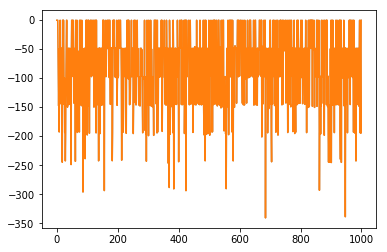

In [75]:
avg_fitness_list = []
best_list = []

for i in range(1):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    #plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
#plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()

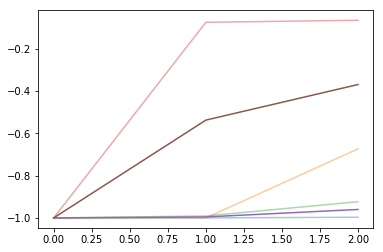

In [22]:
avg_fitness_list = []
best_list = []

for i in range(2):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()

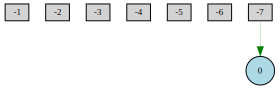

In [12]:
import graphviz
draw_net(config, winner_list[0])

In [10]:
def draw_net(
    config,
    genome,
    view=False,
    filename=None,
    node_names=None,
    show_disabled=True,
    prune_unused=False,
    node_colors=None,
    fmt="png",
):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    if graphviz is None:
        warnings.warn(
            "This display is not available due to a missing optional dependency (graphviz)"
        )
        return

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {"shape": "circle", "fontsize": "9", "height": "0.2", "width": "0.2"}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {
            "style": "filled",
            "shape": "box",
            "fillcolor": node_colors.get(k, "lightgray"),
        }
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {"style": "filled", "fillcolor": node_colors.get(k, "lightblue")}

        dot.node(name, _attributes=node_attrs)

    if prune_unused:
        connections = set()
        for cg in genome.connections.values():
            if cg.enabled or show_disabled:
                connections.add((cg.in_node_id, cg.out_node_id))

        used_nodes = copy.copy(outputs)
        pending = copy.copy(outputs)
        while pending:
            new_pending = set()
            for a, b in connections:
                if b in pending and a not in used_nodes:
                    new_pending.add(a)
                    used_nodes.add(a)
            pending = new_pending
    else:
        used_nodes = set(genome.nodes.keys())

    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {"style": "filled", "fillcolor": node_colors.get(n, "white")}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            # if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = "solid" if cg.enabled else "dotted"
            color = "green" if cg.weight > 0 else "red"
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(
                a, b, _attributes={"style": style, "color": color, "penwidth": width}
            )

    dot.render(filename, view=view)

    return dot